<a href="https://colab.research.google.com/github/Pataraphorn/StyleTransfer/blob/main/Test/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install colab_ssh on google colab
!pip install colab_ssh --upgrade

from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared
launch_ssh_cloudflared(password="1234")

init_git_cloudflared('https://github.com/Pataraphorn/StyleTransfer.git')

# use in colab
!git clone https://github.com/Pataraphorn/StyleTransfer.git clone

%cd clone/Test
!ls

%run main_v2.py

In [1]:
import main as m
import main_v1 as mv1
import utils as fn
import model
import matplotlib.pyplot as plt

ADAM_LR = 0.03
# ADAM_LR = 0.003
STYLE_WEIGHT = 1e1
CONTENT_WEIGHT = 1e-1
IMG_SIZE = (224,224)

In [2]:
BASE_PATH = os.getcwd()
STYLE_IMG = r'./StyleImage/Chakrabhan/0001.jpg'
CONTENT_IMG = r'./ContentImage/animals/Abyssinian_13.jpg'

Load image from path :  ./StyleImage/Chakrabhan/0001.jpg
Load image from path :  ./ContentImage/animals/Abyssinian_13.jpg
C:\Users\mpata\Anaconda3\lib\site-packages\torchvision\transforms\functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


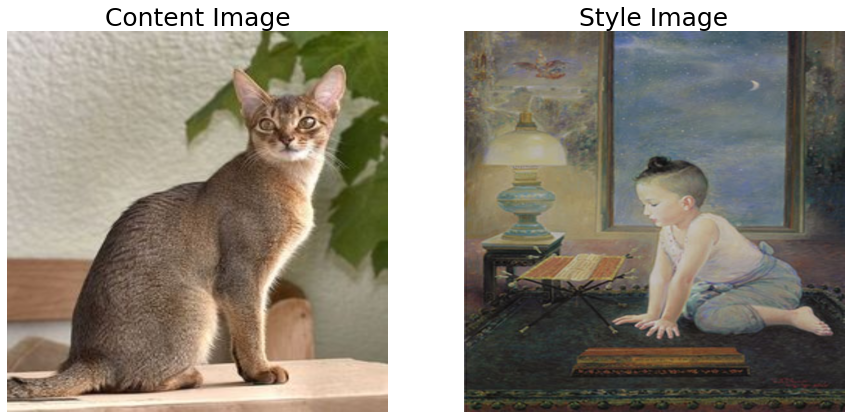

In [3]:
Style = fn.AImage(STYLE_IMG)
Content = fn.AImage(CONTENT_IMG)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,10)) 
#Plotting content image   
ax1.set_title('Content Image', fontsize=25)
ax1.imshow(fn.FImg.resize(Content.Img, (1024,1024)))  
ax1.axis('off')  
#Plotting style image  
ax2.set_title('Style Image', fontsize=25)
ax2.imshow(fn.FImg.resize(Style.Img, (1024,1024)))
ax2.axis('off')
plt.savefig(os.getcwd()+'/output/style_content.jpg', bbox_inches='tight', pad_inches=0.25)  
plt.show()

In [4]:
POOL = 'max' # or 'avg'
VGG = model.VGG19(pool=POOL)

In [ ]:
NUM_EPOCHS = 1000
METHOD = 'before' # or 'after'
COLOR = None # or 'histogram' or 'luminance'

a = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
fn.FImg.save(a, BASE_PATH+'/output/max_before_no.jpg')

In [ ]:
NUM_EPOCHS = 1000
METHOD = 'before' # or 'after'
COLOR = 'histogram'

b = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
fn.FImg.save(b, BASE_PATH+'/output/max_before_histogram.jpg')

In [ ]:
NUM_EPOCHS = 1000
METHOD = 'before' # or 'after'
COLOR = 'luminance'

c = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
fn.FImg.save(c, BASE_PATH+'/output/max_before_luminance.jpg')

In [ ]:
NUM_EPOCHS = 1000
METHOD = 'after'
COLOR = 'histogram'

d = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
fn.FImg.save(d, BASE_PATH+'/output/max_after_histogram.jpg')

In [ ]:
NUM_EPOCHS = 1000
METHOD = 'after'
COLOR = 'luminance'

d = m.main(VGG,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCHS,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
fn.FImg.save(d, BASE_PATH+'/output/max_after_luminance.jpg')

In [ ]:
METHOD = 'before' # or 'after'
COLOR = None # or 'histogram' or 'luminance'
NUM_EPOCH = 5000
VGG19 = mv1.VGG19(pool=POOL)
a2 = mv1.main(VGG19,IMG_SIZE,STYLE_IMG,CONTENT_IMG,METHOD,COLOR,NUM_EPOCH,ADAM_LR,STYLE_WEIGHT,CONTENT_WEIGHT)
fn.FImg.save(a2, BASE_PATH+'/output/max_before_no2.jpg')